# Bucket Test - by LL - 2018-07-29

Assumptions: 

instead of reading files from a folder, we're generating filenames and filesizes at random - thanks to that it can be interactively used and easily shared and tested: just set up what you need and program will create the test case for you. 

The focus is on the algorithm of correct bucket assignments and it's effectiveness. 

Instead of just 4 and 8 buckets and just 100 files, you can set any value you want (well.. almost - some bad values like 0 or more buckets than files will be filtered out :) ). 

There's a quick summary at the end with a graphic visualization of bytes distribution among buckets.

To change the random filenames generation to real-life folder, I would use os.listdir + loop for all files, with the same objects (lists) as used below.  



Let's begin...



In [1]:
import random                    # used for file size generation
import time                      # used for filenames generation based on timestamps
from operator import itemgetter  # used for list sort
import matplotlib.pyplot as plt  # used for visualization part
import sys

set parameters:

In [2]:
debugMode = 1       # print out details of execution
numberOfFiles = int (input("How many files? : "))
numberOfBuckets = int (input("How many buckets? : "))

How many files? : 100
How many buckets? : 4


Quick test if the values given are correct. If not, using default:  

In [3]:
if numberOfBuckets > numberOfFiles or numberOfBuckets == 0 or numberOfFiles == 0: 
    print ('Incorrect number of buckets or files. Using default values (4 & 100)')
    numberOfBuckets = 4
    numberOfFiles = 100

Generating given number of random filenames with random sizes (let's assume: in bytes):

In [4]:
listOfFileNames = []
# initiate a list of 2 dim lists: [0: index to listOfFileNames(lookup), 1: fileSize]
listOfFileSizes = []
for i in range (0, numberOfFiles):
    listOfFileSizes.append([])

for i in range (0, numberOfFiles):
    fileSize = random.randint(100, 10000)
    # add some bigger files at random, to complicate the calculation: 
    if (100 <= fileSize <= 1000):
        fileSize *= 100; 
    # add some unique timestamps for filenames generation:
    sleeptime = random.uniform(0.03, 0.07)
    time.sleep(sleeptime)
    fileName = str(time.time()) + '.csv'
    # fill the lists: 
    listOfFileNames.append(fileName)
    listOfFileSizes[i].append(i)        # this is just an index to listOfFileNames, remember? :)
    listOfFileSizes[i].append(fileSize) 

# sort listOfFiles by size, desc, create new, sorted list    
listOfFileSizesSorted = sorted (listOfFileSizes, key=itemgetter(1), reverse=True)
if (debugMode == 1):
    print (listOfFileSizesSorted)

[[70, 87400], [43, 59500], [44, 51500], [20, 44400], [35, 37000], [88, 19700], [82, 13400], [87, 11900], [64, 9970], [90, 9928], [60, 9880], [41, 9808], [84, 9564], [23, 9349], [65, 9298], [76, 9244], [63, 9221], [46, 9027], [80, 8929], [56, 8897], [52, 8804], [72, 8801], [68, 8628], [22, 8445], [17, 8322], [19, 8302], [31, 8298], [14, 8262], [86, 8224], [61, 7857], [91, 7759], [79, 7689], [11, 7575], [69, 7293], [73, 7287], [4, 7090], [75, 7056], [34, 6834], [45, 6725], [15, 6656], [51, 6649], [40, 6635], [42, 6570], [16, 6398], [26, 6308], [85, 6071], [59, 6047], [33, 6039], [28, 5905], [5, 5654], [36, 5575], [66, 5571], [98, 5569], [27, 5408], [12, 5327], [21, 5169], [53, 5072], [6, 5007], [25, 4925], [7, 4648], [89, 4551], [94, 4544], [67, 4506], [38, 4455], [39, 4438], [78, 4280], [18, 4141], [81, 3962], [0, 3910], [92, 3359], [30, 3199], [71, 3190], [83, 3129], [37, 3111], [32, 3091], [97, 2994], [49, 2986], [96, 2857], [10, 2802], [1, 2772], [74, 2762], [57, 2743], [9, 2732], [5

Create buckets: 

In [5]:
listOfBuckets = []
sizeOfBuckets = []

# initiate lists:
for i in range (0, numberOfBuckets):
    listOfBuckets.append([])
    sizeOfBuckets.append(0)


# init assignment to buckets, first round-robin, no special logic used: 
for i in range (0, numberOfBuckets):
    listOfBuckets[i].append(listOfFileNames[listOfFileSizesSorted[i][0]])
    sizeOfBuckets[i] = listOfFileSizesSorted[i][1]

# assign rest of files: 
for i in range (numberOfBuckets, numberOfFiles):
    findMinBucket = min(sizeOfBuckets)
    for j in range (0, numberOfBuckets):
        if (sizeOfBuckets[j] == findMinBucket):                                   # if smallest bucket:
            sizeOfBuckets[j] += listOfFileSizesSorted[i][1]                       # 1. increase the size of the bucket
            listOfBuckets[j].append(listOfFileNames[listOfFileSizesSorted[i][0]]) # 2. add fileName to the bucket

# generate dynamic summary:             
printSummary = ''
for i in range (0, numberOfBuckets):
    printSummary += str (len(listOfBuckets[i])) + '; '  
    
if (debugMode == 1):
    print ('=== SUMMARY: ===')
    print ('buckets sizes: ' + str(sizeOfBuckets))
    print ('number of files in each bucket: ' + printSummary)
    print ('list of files in each bucket: ')
    print (listOfBuckets)

for i in range (0, numberOfBuckets):
    print ('bucket_' + str(i+1) + ' = ' + str(listOfBuckets[i]) + '; size = ' + str (sizeOfBuckets[i]))

=== SUMMARY: ===
buckets sizes: [205239, 205252, 205208, 205540]
number of files in each bucket: 23; 26; 26; 25; 
list of files in each bucket: 
[['1532887880.7979794.csv', '1532887881.6730118.csv', '1532887880.4098437.csv', '1532887879.7715943.csv', '1532887877.8496544.csv', '1532887881.7980204.csv', '1532887877.507847.csv', '1532887881.1261182.csv', '1532887879.70908.csv', '1532887878.3707826.csv', '1532887878.4778562.csv', '1532887882.4545293.csv', '1532887879.8340967.csv', '1532887882.0013916.csv', '1532887879.0622709.csv', '1532887876.9152024.csv', '1532887881.641777.csv', '1532887879.6153257.csv', '1532887881.0479867.csv', '1532887878.5247335.csv', '1532887879.569901.csv', '1532887880.1309764.csv', '1532887877.008958.csv'], ['1532887879.31093.csv', '1532887881.579273.csv', '1532887880.456717.csv', '1532887880.2421575.csv', '1532887880.500748.csv', '1532887881.4386272.csv', '1532887880.652799.csv', '1532887877.699973.csv', '1532887881.3761244.csv', '1532887877.1328285.csv', '15328

add some drawings to visualize the efficiency:

<BarContainer object of 4 artists>

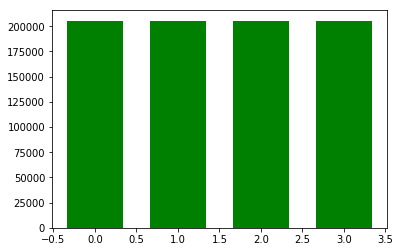

In [6]:
N = numberOfBuckets
x = range(numberOfBuckets)
width = 1/1.5
plt.bar(x, sizeOfBuckets, width, color="green")

Now it is only needed to use buckest to merge files into one per bucket. 
Last command would zip them. 